In [20]:
import random
import math
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd
from sympy import ordered

In [21]:
def ode_model(contamination,t,r,C,m,g):
	
	Contamination = contamination;
	return(r*(1-Contamination/C)*Contamination-m*math.exp(-g*t)*Contamination)
	#return(r*(1-Contamination/C)-m*math.exp(-g*t)*Contamination)

# Extract specific time-ppints from ODE
def deterministic_run(precision,initial_contamination,r,C,m,g):
    tmax = 24
            
    time_space = np.linspace(0,tmax,precision+1)
    
    sim=odeint(ode_model,initial_contamination,time_space,args=(r,C,m,g))
    
    num_at_0=initial_contamination
    num_at_1=sim[int(precision*1.0/tmax)]
    num_at_2=sim[int(precision*2.0/tmax)]
    num_at_4=sim[int(precision*4.0/tmax)]
    num_at_8=sim[int(precision*8.0/tmax)]
    num_at_24=sim[int(precision*24.0/tmax)]
    
    return([num_at_0,num_at_1,num_at_2,num_at_4,num_at_8,num_at_24])

# Import the data


In [23]:
df = pd.read_csv("../../Posterior_Beth_Expt.txt")
#create headers for the dataframe r', 'C', 'mu_detergent' 'gamma_detergent' 'mu_disinfectanct' 'gamma_disinfectanct' 'mu_distilled_water' 'gamma_distilled_water':
df.columns = ['r','C','mu_detergent','gamma_detergent','mu_disinfectant','gamma_disinfectant','mu_distilled_water','gamma_distilled_water']


EmptyDataError: No columns to parse from file

In [ ]:
# Store Experimental data: Detergent, Disinfectant, Control and Distilled Water

Detergent_Means=[[np.zeros((1,6)) for i in range(1)] for j in range(1)] #surface, phase
Detergent_SD=[[np.zeros((1,6)) for i in range(1)] for j in range(1)]

Disinfectant_Means=[[np.zeros((1,6)) for i in range(1)] for j in range(1)]
Disinfectant_SD=[[np.zeros((1,6)) for i in range(1)] for j in range(1)]

Control_Means=[[np.zeros((1,6)) for i in range(1)] for j in range(1)]
Control_SD=[[np.zeros((1,6)) for i in range(1)] for j in range(1)]

Distilled_Means=[[np.zeros((1,6)) for i in range(1)] for j in range(1)]
Distilled_SD=[[np.zeros((1,6)) for i in range(1)] for j in range(1)]


# We store Detergent[Surface][Phase]

# Detergent for the Locker. Phases 1,2,3. 
Detergent_Means[0][0] = [221.6,94.3,56.25,1.75,1.6,8.5]
Detergent_SD[0][0] = [76.4,86.9,89.4,0.5,2.3,4.04]

Disinfectant_Means[0][0] = [59.4,18.7,5.4,5.4,2.4,8.6]
Disinfectant_SD[0][0] = [91.8,26.2,2.30,4.67,4.34,4.28] 

Distilled_Means[0][0] = [261.0,175.5,47,18.6,12.8,56]
Distilled_SD[0][0] = [31.5,61.7,9.0,13.2,78.2,76.4]

Control_Means[0][0] = [59.4,41,52,18.6,21,16.5]
Control_SD[0][0] = [23.5,9.9,21.7,13.2,16.2,6.54]


# Plot Detergent

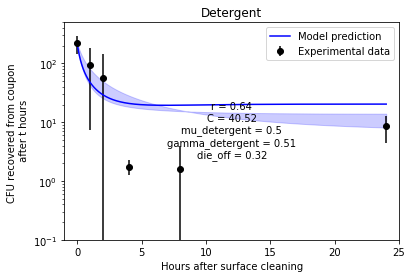

In [ ]:
#Plot errorbars of experiments with predictions ontop

precision=5000
tmax = 24
time_space = np.linspace(0,tmax,precision+1)

#1. Detergent
initial_contamination=Detergent_Means[0][0][0]
P=odeint(ode_model,initial_contamination,time_space,args=(df["r"].median(),df["C"].median(),df["mu_detergent"].median(),df["gamma_detergent"].median()))
Pmin=odeint(ode_model,initial_contamination,time_space,args=(df["r"].quantile(0.05),df["C"].quantile(0.05),df["mu_detergent"].quantile(0.05),df["gamma_detergent"].quantile(0.05)))
Pmax=odeint(ode_model,initial_contamination,time_space,args=(df["r"].quantile(0.95),df["C"].quantile(0.95),df["mu_detergent"].quantile(0.95),df["gamma_detergent"].quantile(0.95)))

# create a vector of values between 0 and 6
x = np.array([0,1,2,4,8,24])

#Define new sd just for plotting to avoid SD value at 0
s = Detergent_SD[0][0]
measurement_data = Detergent_Means[0][0]#np.array([1200,134.0,202.0,294.0])

#Plot errobars of experimental data
plt.errorbar(x,measurement_data,yerr=s,fmt='o', color='black',label='Experimental data')

#Plot the model prediction
plt.plot(time_space,P,label="Model prediction",color='blue')

#Plot confidence intervals around the model prediction

plt.fill_between(time_space,np.concatenate(Pmin),np.concatenate(Pmax),alpha=0.2,color='blue')
#plt.plot(time_space,Pmin,label="Model prediction",color='red')
#plt.plot(time_space,Pmax,label="Model prediction",color='red')

#plt.fill_between(x, np.array(map(operator.sub, P["Contamination"], Pmin["Contamination"])), np.array(map(operator.add, P["Contamination"], Pmax["Contamination"])), color='b', alpha=.1)
plt.xlim(-1,25)
plt.ylim(0.1,500)
plt.ylabel("CFU recovered from coupon \n after t hours")
plt.yscale("log")
plt.xlabel("Hours after surface cleaning")
plt.legend(loc="upper right")
plt.title("Detergent")
#add parameter values to the plot
plt.text(0.5, 0.5, 'r = '+str(round(df["r"].median(),2))+'\nC = '+str(round(df["C"].median(),2))+'\nmu_detergent = '+str(round(df["mu_detergent"].median(),2))+'\ngamma_detergent = '+str(round(df["gamma_detergent"].median(),2)),
        horizontalalignment='center',
        verticalalignment='center',
        transform = plt.gca().transAxes)

#save the plot
plt.savefig("abc_prediction_BethExpt_detergent.png", dpi=600)

plt.show()

# Plot Disinfectant

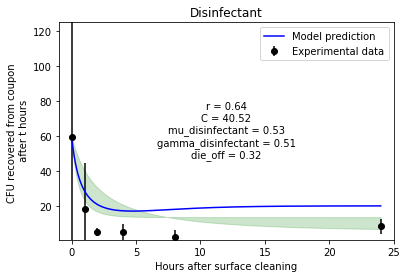

In [ ]:
precision=5000
tmax = 24
time_space = np.linspace(0,tmax,precision+1)

#2. disinfectant
initial_contamination=Disinfectant_Means[0][0][0]
P=odeint(ode_model,initial_contamination,time_space,args=(df["r"].median(),df["C"].median(),df["mu_disinfectant"].median(),df["gamma_disinfectant"].median()))
Pmin=odeint(ode_model,initial_contamination,time_space,args=(df["r"].quantile(0.05),df["C"].quantile(0.05),df["mu_disinfectant"].quantile(0.05),df["gamma_disinfectant"].quantile(0.05)))
Pmax=odeint(ode_model,initial_contamination,time_space,args=(df["r"].quantile(0.95),df["C"].quantile(0.95),df["mu_disinfectant"].quantile(0.95),df["gamma_disinfectant"].quantile(0.95)))

# create a vector of values between 0 and 6
x = np.array([0,1,2,4,8,24])

#Define new sd just for plotting to avoid SD value at 0
s = Disinfectant_SD[0][0]
measurement_data = Disinfectant_Means[0][0]#np.array([1200,134.0,202.0,294.0])

#Plot errobars of experimental data
plt.errorbar(x,measurement_data,yerr=s,fmt='o', color='black',label='Experimental data')

#Plot the model prediction
plt.plot(time_space,P,label="Model prediction",color='blue')

#Plot confidence intervals around the model prediction

plt.fill_between(time_space,np.concatenate(Pmin),np.concatenate(Pmax),alpha=0.2,color='green')
#plt.plot(time_space,Pmin,label="Model prediction",color='red')
#plt.plot(time_space,Pmax,label="Model prediction",color='red')

#plt.fill_between(x, np.array(map(operator.sub, P["Contamination"], Pmin["Contamination"])), np.array(map(operator.add, P["Contamination"], Pmax["Contamination"])), color='b', alpha=.1)
plt.xlim(-1,25)
plt.ylim(1,125)
plt.ylabel("CFU recovered from coupon \n after t hours")
#plt.yscale("log")
plt.xlabel("Hours after surface cleaning")
plt.legend(loc="upper right")
plt.title("Disinfectant")
plt.text(0.5, 0.5, 'r = '+str(round(df["r"].median(),2))+'\nC = '+str(round(df["C"].median(),2))+'\nmu_disinfectant = '+str(round(df["mu_disinfectant"].median(),2))+'\ngamma_disinfectant = '+str(round(df["gamma_disinfectant"].median(),2)),
        horizontalalignment='center',
        verticalalignment='center',
        transform = plt.gca().transAxes)

#save the plot
plt.savefig("abc_prediction_BethExpt_disinfectant.png", dpi=600)

plt.show()


# Distilled water

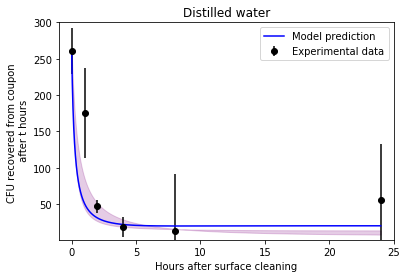

In [ ]:
precision=5000
tmax = 24
time_space = np.linspace(0,tmax,precision+1)

#2. disinfectant
initial_contamination=Distilled_Means[0][0][0]
P=odeint(ode_model,initial_contamination,time_space,args=(df["r"].median(),df["C"].mean(),df["mu_distilled_water"].median(),df["gamma_distilled_water"].median()))
Pmin=odeint(ode_model,initial_contamination,time_space,args=(df["r"].quantile(0.05),df["C"].quantile(0.05),df["mu_distilled_water"].quantile(0.05),df["gamma_distilled_water"].quantile(0.05)))
Pmax=odeint(ode_model,initial_contamination,time_space,args=(df["r"].quantile(0.95),df["C"].quantile(0.95),df["mu_distilled_water"].quantile(0.95),df["gamma_distilled_water"].quantile(0.95)))

# create a vector of values between 0 and 6
x = np.array([0,1,2,4,8,24])

#Define new sd just for plotting to avoid SD value at 0
s = Distilled_SD[0][0]
measurement_data = Distilled_Means[0][0]#np.array([1200,134.0,202.0,294.0])

#Plot errobars of experimental data
plt.errorbar(x,measurement_data,yerr=s,fmt='o', color='black',label='Experimental data')

#Plot the model prediction
plt.plot(time_space,P,label="Model prediction",color='blue')

#Plot confidence intervals around the model prediction

plt.fill_between(time_space,np.concatenate(Pmin),np.concatenate(Pmax),alpha=0.2,color='purple')
#plt.plot(time_space,Pmin,label="Model prediction",color='red')
#plt.plot(time_space,Pmax,label="Model prediction",color='red')

#plt.fill_between(x, np.array(map(operator.sub, P["Contamination"], Pmin["Contamination"])), np.array(map(operator.add, P["Contamination"], Pmax["Contamination"])), color='b', alpha=.1)
plt.xlim(-1,25)
plt.ylim(1,300)
plt.ylabel("CFU recovered from coupon \n after t hours")
#plt.yscale("log")
plt.xlabel("Hours after surface cleaning")
plt.legend(loc="upper right")
plt.title("Distilled water")
plt.text(0.5, 0.5, 'r = '+str(round(df["r"].median(),2))+'\nC = '+str(round(df["C"].median(),2))+'\nmu_distilled_water = '+str(round(df["mu_distilled_water"].median(),2))+'\ngamma_distilled_water = '+str(round(df["gamma_distilled_water"].median(),2)),
        horizontalalignment='center',
        verticalalignment='center',
        transform = plt.gca().transAxes)
#save the plot
plt.savefig("abc_prediction_BethExpt_distilled_water.png", dpi=600)

plt.show()

# Control

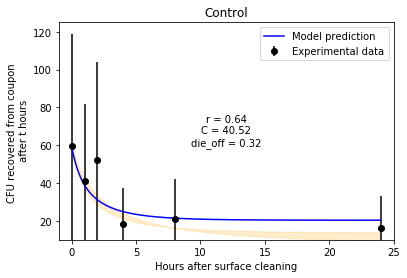

In [ ]:
precision=5000
tmax = 24
time_space = np.linspace(0,tmax,precision+1)

#2. disinfectant
initial_contamination=Control_Means[0][0][0]
P=odeint(ode_model,initial_contamination,time_space,args=(df["r"].median(),df["C"].median(),0,0))
Pmin=odeint(ode_model,initial_contamination,time_space,args=(df["r"].quantile(0.05),df["C"].quantile(0.05),0,0))
Pmax=odeint(ode_model,initial_contamination,time_space,args=(df["r"].quantile(0.95),df["C"].quantile(0.95),0,0))

# create a vector of values between 0 and 6
x = np.array([0,1,2,4,8,24])

#Define new sd just for plotting to avoid SD value at 0
s = Control_Means[0][0]
measurement_data = Control_Means[0][0]#np.array([1200,134.0,202.0,294.0])

#Plot errobars of experimental data
plt.errorbar(x,measurement_data,yerr=s,fmt='o', color='black',label='Experimental data')

#Plot the model prediction
plt.plot(time_space,P,label="Model prediction",color='blue')

#Plot confidence intervals around the model prediction

plt.fill_between(time_space,np.concatenate(Pmin),np.concatenate(Pmax),alpha=0.2,color='orange')
#plt.plot(time_space,Pmin,label="Model prediction",color='red')
#plt.plot(time_space,Pmax,label="Model prediction",color='red')

#plt.fill_between(x, np.array(map(operator.sub, P["Contamination"], Pmin["Contamination"])), np.array(map(operator.add, P["Contamination"], Pmax["Contamination"])), color='b', alpha=.1)
plt.xlim(-1,25)
plt.ylim(10,125)
plt.ylabel("CFU recovered from coupon \n after t hours")
#plt.yscale("log")
plt.xlabel("Hours after surface cleaning")
plt.legend(loc="upper right")
plt.title("Control")
# add the values of the parameters to the plot
plt.text(0.5, 0.5, 'r = ' + str(round(df["r"].median(),2)) + '\n' + 'C = ' + str(round(df["C"].median(),2)),
        horizontalalignment='center',
        verticalalignment='center',
        transform=plt.gca().transAxes)
        
#save the plot
plt.savefig("abc_prediction_BethExpt_control.png", dpi=600)

plt.show()


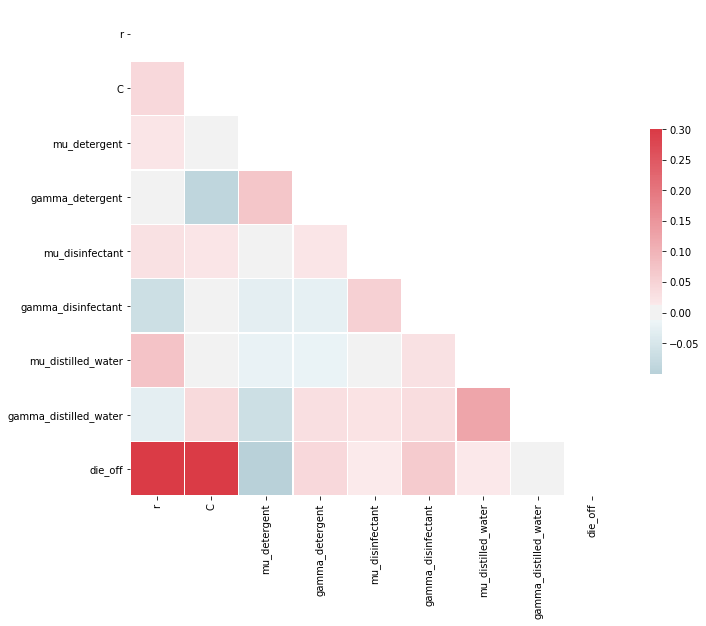

In [ ]:


# Create pairplots of 50% of df
# make histograms in the diagonal with colour green 
# make scatterplots in the upper triangle with colour blue
#g = sns.pairplot(df, diag_kind="kde",corner=True)
#g.map_lower(sns.kdeplot, levels=4, color=".2")

#Create a heatmap of correlations, anotate by p-value
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

# sns.heatmap(df.corr(),annot=True)

In [ ]:
df.describe()

,r,C,mu-detergent,gamma-detergent,mu-disinfectant,gamma-disinfectant,mu-distilled-water,gamma-distilled-water,die_off
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,0.591299,40.341188,0.505991,0.508988,0.514662,0.514876,0.462525,0.537913,0.348898
std,0.272396,16.986121,0.288530,0.282117,0.278590,0.279990,0.279929,0.276786,0.223340
min,0.001752,1.087101,0.010203,0.008276,0.010503,0.000315,0.010911,0.006164,0.001279
25%,0.374012,27.092177,0.263234,0.261530,0.287993,0.290919,0.218165,0.308269,0.171202
50%,0.638577,40.524808,0.501379,0.511635,0.526131,0.507533,0.448630,0.547475,0.317811
75%,0.830506,54.584169,0.747974,0.749161,0.751773,0.746498,0.687635,0.775412,0.495339
max,0.998731,69.933323,0.999445,0.998863,0.999629,0.998386,0.998954,0.999705,1.031695


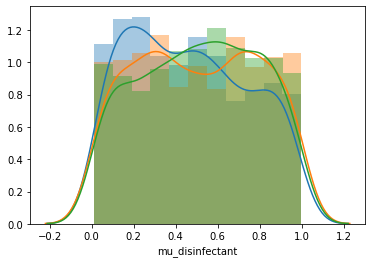

In [ ]:
# Create histograms 
#sns.distplot(df["r"])
#sns.distplot(df["C"])
#plot all mu_distilled_water, mu_detergent and mu_distilled_water together
sns.distplot(df["mu_distilled_water"])
sns.distplot(df["mu_detergent"])
sns.distplot(df["mu_disinfectant"])






In [ ]:
# df pairplot
#sns.pairplot(df, diag_kind="hist",corner=True)



TypeError: wide_to_long() missing 2 required positional arguments: 'i' and 'j'

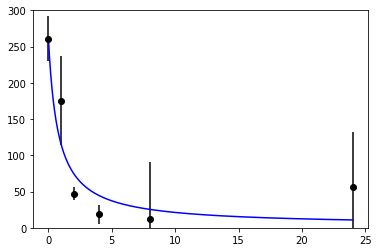

In [ ]:
precision=5000
tmax = 24
time_space = np.linspace(0,tmax,precision+1)

#2. Distilled
initial_contamination=Distilled_Means[0][0][0]
P=odeint(ode_model,initial_contamination,time_space,args=(.025,5,0,0))

# create a vector of values between 0 and 6
x = np.array([0,1,2,4,8,24])

#Define new sd just for plotting to avoid SD value at 0
s = Distilled_SD[0][0]
measurement_data = Distilled_Means[0][0]#np.array([1200,134.0,202.0,294.0])

#Plot errobars of experimental data
plt.errorbar(x,measurement_data,yerr=s,fmt='o', color='black',label='Experimental data')
#plt.yscale("log")
#plt.xlabel("Hours after surface cleaning")
plt.ylim(0,300)
#Plot the model prediction
plt.plot(time_space,P,label="Model prediction",color='blue')

plt.show()